In [ ]:
%pip install tweet-preprocessor
%pip install -U spacy
%pip install pyLDAvis
%pip install wordcloud
%python -m spacy download nl_core_news_sm

# Topic Modeling and Clustering for Online Social Media Data

 ## Dataset
 The data used in this assignment is Dutch text data. We collected the COVID-19 crisis related messages from online social media (Twitter) from January to November 2021. Then, a subset of raw tweets was randomly sampled. In total, our dataset includes the text data of about 100K messages.

In [3]:
# Import the packages
import io
import spacy
import preprocessor as p
import tqdm

# Read the data
def phase0_open_txt_stream(filename):
    return io.open(filename, "r", encoding="utf-8")

pipe = phase0_open_txt_stream("./data/raw_data.txt")

for i in range(5):
    print(next(pipe))
    print("")

pipe.close()

Hahah, het verzet is begonnen. Het knalt hier op z'n best hoor. Voor mijn dieren vind ik het erg, maar f@ck die maffe regering hier. Gelukkig nieuwjaar!


RT @D66Vught: Het is 2021! https://t.co/LpPuFPuqR8


@MijumewAndCo Happy new year mij!


Fantastisch dat ik zoveel vuurwerk hoor..... We worden echt wakker yes. En het boeit mij niet wat een ander er van denkt.\nOp naar een Great Awakening en happy new year 😃🎉🙏❤️


Gelukkig nieuwjaar allemaal!!!! Binnen exact een maand ben ik jarig en ik hoop dat ik dan eindelijk birthdaySEX kan hebben xxx




 ## 1.1 Data Processing
 In the first part of the assignment, please first filter the messages and use the messages belonging to your allocated theme for the identification of topics. For that you will need to:
 -	Design your query (e.g. a regular expression or a set of keywords) and filter the related messages for your allocated theme. 
 -	Clean your filtered messages and preprocess them into the right representation. Please refer to the text data pre-processing and representation methods discussed in the lecture. You may use some of the recommended packages for text data preprocessing and representation.

In [4]:
# Filter the related messages
keywords = ['testen', 'test', 'getest', 'pcr', 'antigeen']
tweets = []

with open('./data/raw_data.txt') as file:
    for line in file:
        line = line.replace('\\n', ' ')
        line = line.replace('\\t', ' ')
        line = ' '.join(line.lower().strip().split())
        for kw in keywords:
            if kw in line:
                tweets.append(line)
                break

print(f'The number of tweets with one or more keywords in it are: ', len(tweets)) 

The number of tweets with one or more keywords in it are:  12679


In [5]:
# Clean the messages
import preprocessor as p

# Removing URLs, emojis, reserved words, smileies, numbers
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.RESERVED, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER)

tweets = [p.clean(tweet) for tweet in tweets]
for tweet in tweets[:10]:
    print(tweet)

er was nu toch al een #vuurwerkverbod heeft niks geholpen huilstruik!
gelukkig een sponsje! heb me voor de tweede keer laten testen; de eerste keer op een stoel met iemand die zorgvuldig was, niets van gevoeld. nu bij een autostraat ,met iemand schuin voor de open ruit: veel ruwer,heel pijnlijk en nu twee blauwe plekken onder mijn ogen
"er is ook het risico van vals-positieve resultaten. hoe meer mensen uit niet-risicogebieden worden getest, hoe hoger het percentage zou zijn. #coronafascisme #vaccindwang #hugodejonge #spoedwet #totalcontrol
brekend: pcr test mag niet afgedwongen worden aan nederlanders in het buitenland. lees het vonnis op #pcrtest
ander belangrijk feit is dat het pcr protocol waarmee wij in nederland % van de pcr-tests uitvoeren grote fouten bevat. beginnersfouten die iedere specialist direct opmerkt. het protocol is niet geschikt voor betrouwbare sarscov2 detectie. zie
lees "ethiopische troepen doodden mensen bij rellen na moord op protestzanger" op nieuwsblik - - et

In [6]:
# Preprocess the messages
import tqdm
import spacy

nlp = spacy.load("nl_core_news_sm")

processed_tweets = []
for tweet in tqdm.tqdm(tweets[:5000]):
    tweet = nlp(tweet)
    processed_tweet = []
    for token in tweet:
        if token.is_stop:  # remove stop words
            continue
        if token.is_punct:  # remove punctuations
            continue
        processed_tweet.append(token.lemma_)  # lemmatization
    processed_tweet = ' '.join(processed_tweet)
    processed_tweets.append(processed_tweet)

for tweet in processed_tweets[:10]:
    print(tweet)

100%|██████████| 5000/5000 [00:46<00:00, 107.82it/s]

vuurwerkverbod niks helpen huilstruik
gelukkig spons twee keer laten testen keer stoel zorgvuldig gevoelen autostraat schuin open ruit ruw heel pijnlijk twee blauw plek oog
risico vals-positieve resultaat mens niet-risicogebied testen hoog percentage coronafascisme vaccindwang hugodejonge spoedwet totalcontrol
breken pcr test afdwingen nederlander buitenland lezen vonnis pcrtest
belangrijk feit pcr protocol waarmee nederland pcr-test uitvoeren groot fout bevatten beginnersfout ieder specialist direct opmerken protocol geschikt betrouwbaar sarscov2 detectie zien
lezen ethiopisch troep doden mens rel moord protestzanger nieuwsblik ethiopisch ordetroepen vi dag mens doden etnisch geweld zomer uitbreken dood
breken pcr test afdwingen nederlander buitenland lezen vonnis pcrtest
jaar denken gaan testen naief
school selecteren regelmatig testen eindelijk inzicht krijgen evolutie virus schoolpoort benutten amper /3 beloven testcapaciteit
nieuwjaar mineur schoonzoon testen zonet positief covid 

In [7]:
# Represent the messages into formats that can be used in clustering or LDA algorithms (you may need different represention for two algorithms)
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(processed_tweets)
bow_array = bow.toarray()
feature_names = bow_vectorizer.get_feature_names_out()
print(bow_array)
print(bow_array.shape)
print(feature_names)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5000, 11372)
['00' '000' '01' ... 'zzp' 'zzper' 'één']


 ## 1.2 Exploratory Data Analysis
 After preprocessing the data, create at least 2 figures or tables that help you understand the data.

 While exploring the data, you may also think about questions such as:
 - Can you spot any differences between Twitter data and usual text data?
 - Does your exploration reveal some issues that would make it difficult to interpret the topics?
 - Can you improve the data by adding additional preprocessing steps?

## Frequent words in the tweets

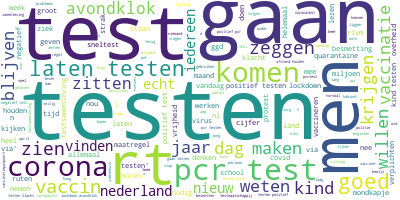

In [8]:
# Plot figure in a word cloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', max_words=11500, contour_width=3, contour_color='steelblue').generate(str(processed_tweets))
wordcloud.to_image()

## Frequent hashtags in the tweets

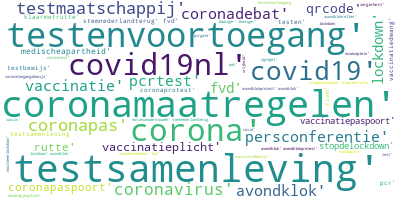

In [9]:
def only_hashtags(tweet):
    """
    This function saves all the hashtags in a tweet and returns it in a list
    """
    hashtags = []

    # Checking every word of a tweet
    for word in tweet.split():
        # Checking if the word has a hashtag and add to a list
        if word[0] == '#':
            hashtags.append(word[1:])

    return hashtags

# List for all the hashtags in the tweets
hashtag_list = []

for tweet in tweets:
    hashtags = only_hashtags(tweet)
    hashtag_list.append(hashtags)

# Displaying the tweets in a wordcloud
wordcloud = WordCloud(background_color='white', max_words=11500, contour_width=3, contour_color='steelblue').generate(str(hashtag_list))
wordcloud.to_image()

## 2.1 Topic modelling and clustering
 In the second part of the assignment, you will first:
 -	Implement a Latent Dirichlet Allocation (LDA) algorithm to identify the discussed topics for your theme
 -	Implement a clustering method  to cluster messages into different groups, then represent the topic of each cluster using a bag of words

While implementing the algorithms, you may use the codes from the recommended packages. In the final report, please explain reasons to select the used algorithm/package. 

## Topic modelling: Latent Dirichlet Allocation

In [10]:
# Topic modeling using the LDA algorithm
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit_transform(bow_array)

array([[0.04011579, 0.04011938, 0.83872799, 0.0401862 , 0.04085065],
       [0.00923618, 0.96315837, 0.00921011, 0.00919126, 0.00920408],
       [0.0126763 , 0.55051844, 0.41131722, 0.01265714, 0.0128309 ],
       ...,
       [0.94163202, 0.01461719, 0.01456074, 0.0145411 , 0.01464896],
       [0.02878884, 0.8836805 , 0.02904727, 0.02931443, 0.02916895],
       [0.01136099, 0.01130524, 0.01140024, 0.28790251, 0.67803102]])

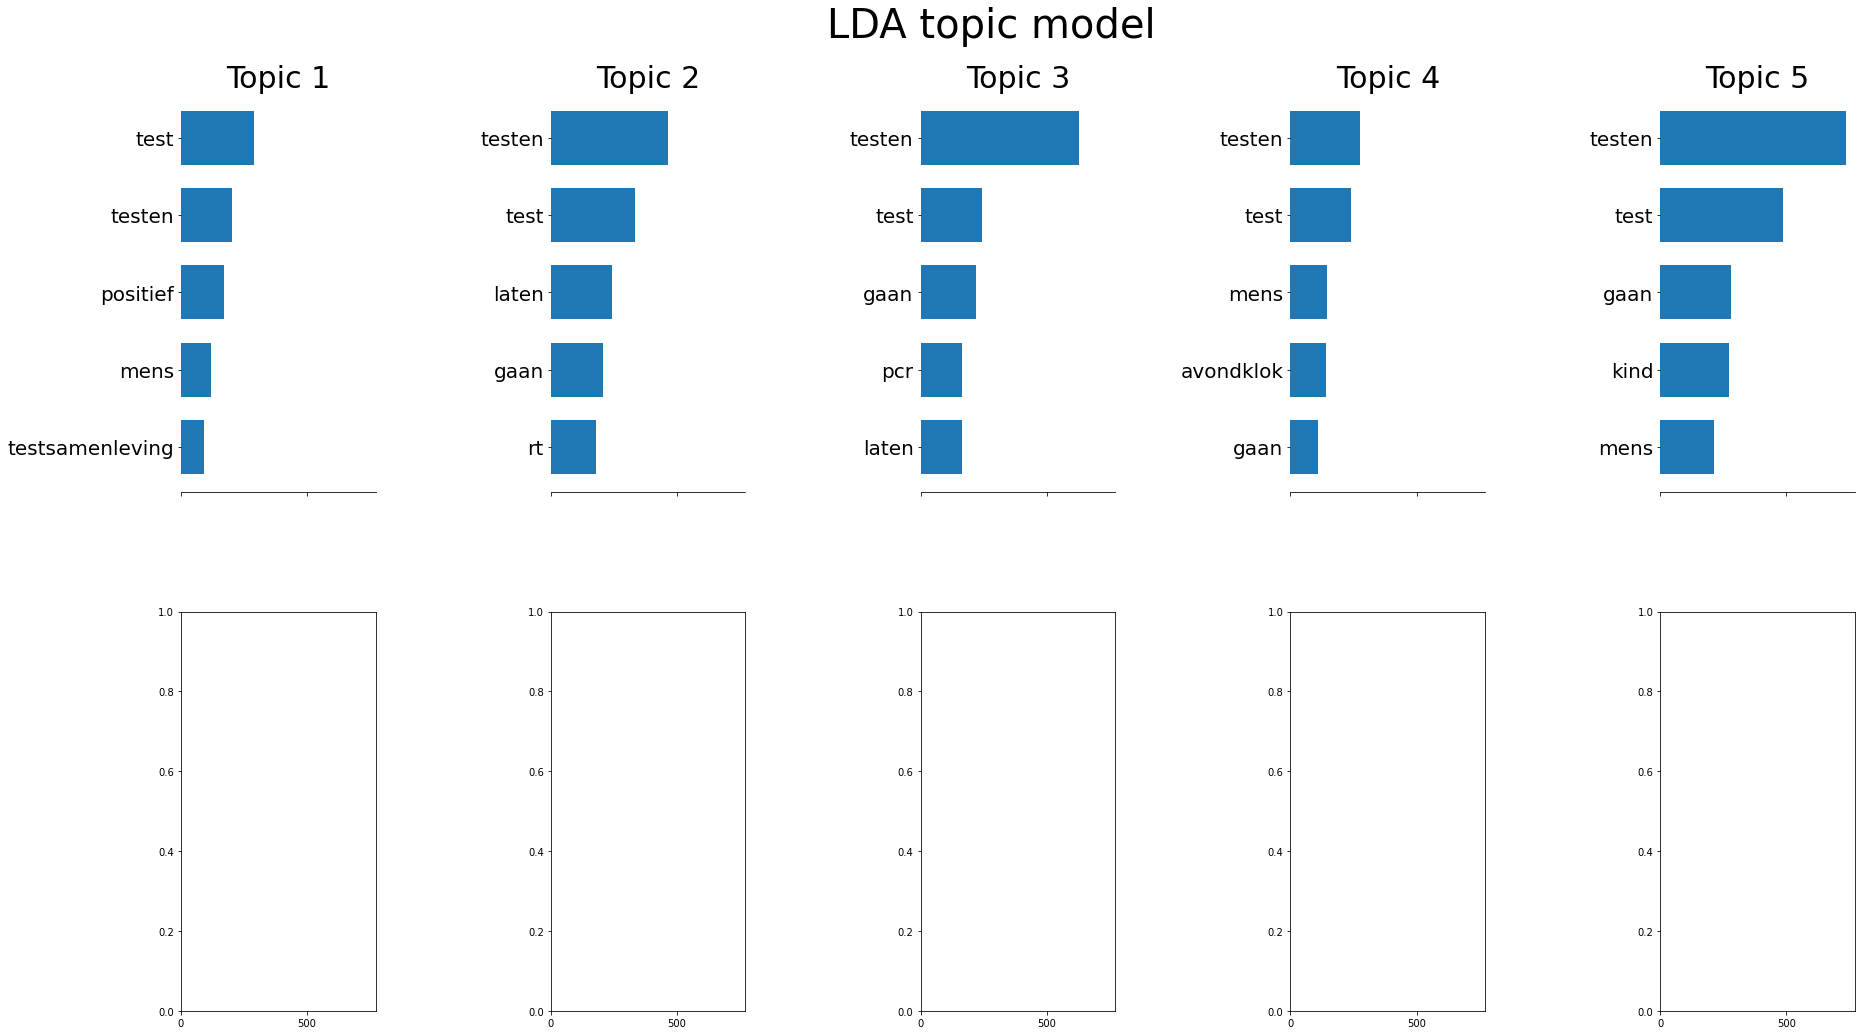

In [11]:
# Visualizing the LDA model
import matplotlib.pyplot as plt

feature_names = bow_vectorizer.get_feature_names_out() # Extracting feature names

# Defining a plot matrix for the plots
fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
axes = axes.flatten()

# Inspired by the sklearn documentation visualization at following link: 
## https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[: -5 - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LDA topic model', fontsize=40)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

## Clustering: Agglomerative

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.metrics as metrics

clustering = AgglomerativeClustering(n_clusters=4).fit(bow_array)
clustering_labels = clustering.labels_

# Apply PCA for visualization purposes
pca = PCA(n_components=2)
scatter = pca.fit_transform(bow_array)

x_axis = [points[0] for points in scatter]
y_axis = [points[1] for points in scatter]

# Plot models on the principal components
fig = px.scatter(
    x=x_axis,
    y=y_axis,
    color=clustering_labels,
    title='Aglommerative clustering'
)

# Add label names
fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2",
)

# Compute the Silhouette Score
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(bow, clustering_labels))

Silhouette Coefficient: 0.012


Text(0.5, 1.0, 'cluster4')

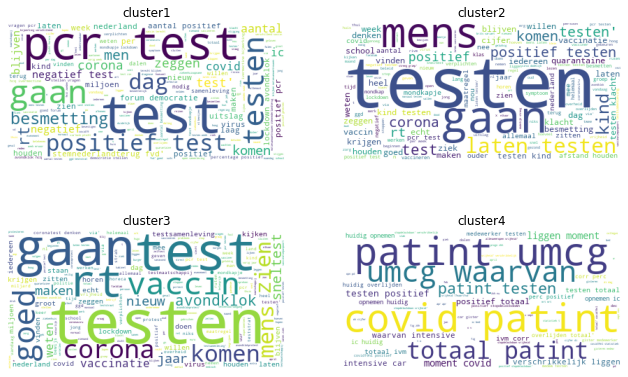

In [13]:
from wordcloud import WordCloud

# Initializing tweet lists per cluster
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

# Seperating the tweets based on the given label
for label, tweet in zip(clustering.labels_, processed_tweets):
    if label == 0:
        cluster1.append(tweet)
    elif label == 1:
        cluster2.append(tweet)
    elif label == 2:
        cluster3.append(tweet)
    elif label == 3:
        cluster4.append(tweet)

# Defining the figure
plt.figure(figsize=(11, 7))

#plot 1
plt.subplot(221)
wordcloud = WordCloud(background_color='white', max_words=1500, contour_width=3, contour_color='steelblue').generate(str(cluster1))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("cluster1")

#plot 2
plt.subplot(222)
wordcloud = WordCloud(background_color='white', max_words=1500, contour_width=3, contour_color='steelblue').generate(str(cluster2))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("cluster2")

#plot 3
plt.subplot(223)
wordcloud = WordCloud(background_color='white', max_words=11500, contour_width=3, contour_color='steelblue').generate(str(cluster3))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("cluster3")

#plot 4
plt.subplot(224)
wordcloud = WordCloud(background_color='white', max_words=1500, contour_width=3, contour_color='steelblue').generate(str(cluster4))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("cluster4")

 ## 2.2 Results, evaluation and Interpretation 
 
Finally, you will describe, evaluate and interpret your findings from two methods. 

- In the report, you need to describe and discuss the similarity and difference of results from two methods.
- While evaluating the results, human judgment is very important, so visualization techniques are helpful to evaluate the identified topics in an interpreted manner. 
    
1. For evaluating the topic modelling algorithm, please first use the interactive tool **[pyLDAvis](https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=)** to examine the inter-topic separation of your findings. 

2. For interpreting the identified topics / clusters of both algorithms, we provide example code for several visualization techiques. You can use multiple ones to evaluate your results or come up with visualisations on your own. The files contain examples for how to use the visualisation functions.


In [ ]:
# Evaluation 
import numpy as np
import pyLDAvis.sklearn
import pyLDAvis

pyLDAvis.enable_notebook()

bam = np.matrix(bow_array)
dash = pyLDAvis.sklearn.prepare(lda, bam, bow_vectorizer, mds='tsne', sort_topics=False)
dash

# Bonus Tasks 

We would like to challenge you with the following bonus task. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement another clustering algorithm or design your own clustering algorithm. Discuss your findings and explain why this is a better (or worse) clustering algorithm than the above one (the clustering algorithm, not LDA).

2. Can you think of other evaluation methods than the provided visualization techniques? If so, implement one and explain why it is a good evaluation for our task.

## Bonus 1: clustering algorithm (KMeans)

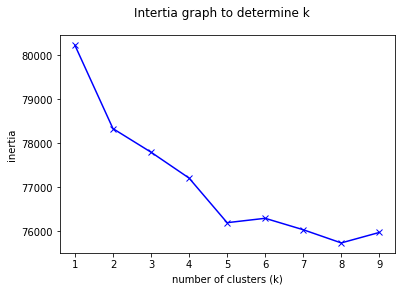

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate inertia 
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(bow)
    inertias.append(model.inertia_)

# Plot the inertia graph
plt.plot(ks, inertias, 'bx-')
plt.suptitle("Intertia graph to determine k")
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Silhouette Coefficient: 0.020


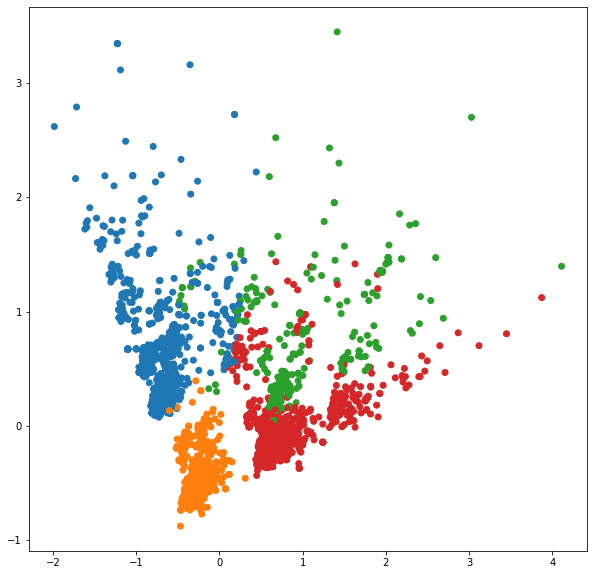

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

# Defining the model and making cluster predictions
model = KMeans(n_clusters=4, max_iter=1000, random_state=42).fit(bow)
centers = model.cluster_centers_.argsort()[:,::-1]
kmean_predict = model.labels_

# Making a word list per cluster
for i in range(3):
    word_list=[]
    for j in centers[i,:10]:
        word_list.append(feature_names[j])

# Perform PCA for visualization purposes
pca = PCA(n_components=2)
scatter = pca.fit_transform(bow_array)

# Plot the datapoints
colors = sns.color_palette()

x_axis = [points[0] for points in scatter]
y_axis = [points[1] for points in scatter]

fix, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_predict])

# Compute the Silhouette Score
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(bow, model.labels_))

Text(0.5, 1.0, 'cluster=10')

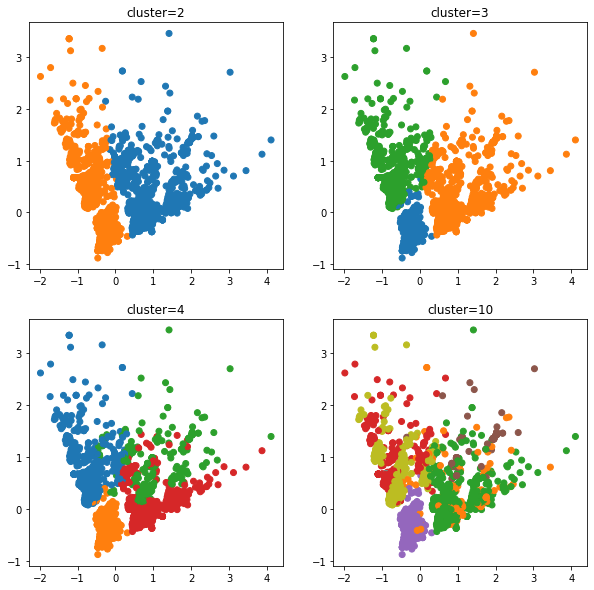

In [21]:
from sklearn.decomposition import PCA
import seaborn as sns

plt.figure(figsize=(10, 10))

# Applying PCA for visualization purposes
pca = PCA(n_components=2)
scatter = pca.fit_transform(bow.toarray())

# Defining the axis
x_axis = [points[0] for points in scatter]
y_axis = [points[1] for points in scatter]

colors = sns.color_palette()

#plot 1
model = KMeans(n_clusters=2, max_iter=1000, random_state=42).fit(bow)
centers = model.cluster_centers_.argsort()[:,::-1]

plt.subplot(221)
plt.scatter(x_axis, y_axis, c=[colors[d] for d in model.labels_])
plt.title("cluster=2")

#plot2
model = KMeans(n_clusters=3, max_iter=1000, random_state=42).fit(bow)
centers = model.cluster_centers_.argsort()[:,::-1]

plt.subplot(222)
plt.scatter(x_axis, y_axis, c=[colors[d] for d in model.labels_])
plt.title("cluster=3")

#plot3
model = KMeans(n_clusters=4, max_iter=1000, random_state=42).fit(bow)
centers = model.cluster_centers_.argsort()[:,::-1]

plt.subplot(223)
plt.scatter(x_axis, y_axis, c=[colors[d] for d in model.labels_])
plt.title("cluster=4")

#plot4
model = KMeans(n_clusters=10, max_iter=1000, random_state=42).fit(bow)
centers = model.cluster_centers_.argsort()[:,::-1]

plt.subplot(224)
plt.scatter(x_axis, y_axis, c=[colors[d] for d in model.labels_])
plt.title("cluster=10")

Text(0.5, 1.0, 'cluster4')

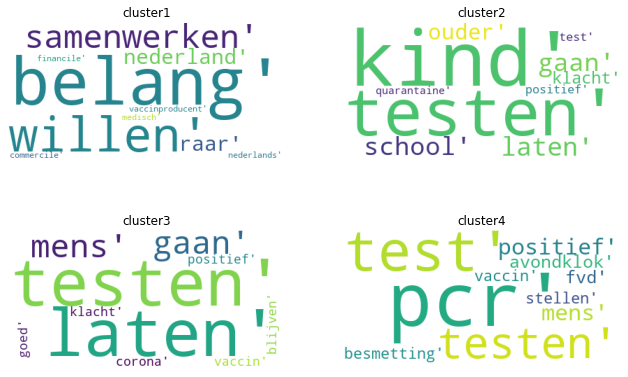

In [22]:
from wordcloud import WordCloud

# Making a wordlist for evert cluster
cluster = []
for i in range(0,k):
    word_list=[]
    for j in centers[i,:10]:
        word_list.append(feature_names[j])
    cluster.append(word_list)
    
cluster1 = cluster[0]
cluster2 = cluster[1]
cluster3 = cluster[2]
cluster4 = cluster[3]

# Defining the figure
plt.figure(figsize=(11, 7))

#plot 1
plt.subplot(221)
wordcloud = WordCloud(background_color='white', max_words=11500, contour_width=3, contour_color='steelblue').generate(str(cluster1))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("cluster1")

#plot 2
plt.subplot(222)
wordcloud = WordCloud(background_color='white', max_words=11500, contour_width=3, contour_color='steelblue').generate(str(cluster2))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("cluster2")

#plot 3
plt.subplot(223)
wordcloud = WordCloud(background_color='white', max_words=11500, contour_width=3, contour_color='steelblue').generate(str(cluster3))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("cluster3")

#plot 4
plt.subplot(224)
wordcloud = WordCloud(background_color='white', max_words=11500, contour_width=3, contour_color='steelblue').generate(str(cluster4))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("cluster4")

## Bonus 2: extra evaluation method

In [23]:
#Evaluation using perplexity score
perplexity_score = lda.perplexity(bow_array)
print(f'The perplexity score for the LDA model is {perplexity_score}')

The perplexity score for the LDA model is 3282.8035576415846
